In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

pd.options.mode.chained_assignment = None

# Import Data

In [237]:
# Import the data
df = pd.read_csv("clean_data.csv", low_memory=False)


In [238]:
# View column names and drop unnecesary columns for the model 
df.columns


Index(['id', 'expid', 'membid', 'myear', 'sex', 'calcage', 'citizen', 'status',
       'msolo', 'msuccess', 'msmtdate1', 'msmtdate2', 'msmtdate3', 'route1',
       'route2', 'route3', 'route4', 'mo2used', 'mo2none', 'mo2climb',
       'mo2descent', 'mo2sleep', 'death', 'deathdate', 'msmtbid', 'stdrte',
       'new_route', 'new_status', 'climber_count'],
      dtype='object')

# Feature Selection

In [239]:
# Set features
feature_names = ['sex', 'calcage', 'citizen', 'msolo', 'new_route', 'mo2used', 'mo2climb',
                 'mo2descent', 'mo2sleep', 'stdrte', 'new_status']

X = df[feature_names]

In [240]:
# Convert X values to numerical 

###                KEY                  ### 
###        Male = 0, Female = 1         ###
###        True = 1, False = 0          ###oute, 
###  Citizen and Route = see label map  ###

X.replace(True, 1, inplace=True)
X['sex'] = pd.get_dummies(X['sex'])

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

# Perform label transformation and create label maps for later use 
X['citizen'] = le.fit_transform(X['citizen'])
country_label_map = dict(zip(le.classes_, le.transform(le.classes_)))
X['new_route'] = le.fit_transform(X['new_route'])
route_label_map = dict(zip(le.classes_, le.transform(le.classes_)))
X['new_status'] = le.fit_transform(X['new_status'])
status_label_map = dict(zip(le.classes_, le.transform(le.classes_)))

X

,sex,calcage,citizen,msolo,new_route,mo2used,mo2climb,mo2descent,mo2sleep,stdrte,new_status
0,0,49,15,0.0,2,0.0,0.0,0.0,0.0,1.0,3
1,1,30,89,0.0,2,0.0,0.0,0.0,0.0,1.0,3
2,0,32,15,0.0,2,1.0,1.0,0.0,1.0,1.0,0
3,0,40,85,0.0,2,0.0,0.0,0.0,0.0,1.0,5
4,0,29,85,0.0,2,1.0,1.0,0.0,1.0,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...
21693,0,47,28,0.0,0,1.0,1.0,0.0,0.0,1.0,0
21694,0,37,28,0.0,0,1.0,1.0,0.0,1.0,1.0,0
21695,0,57,28,0.0,0,1.0,1.0,0.0,1.0,1.0,0
21696,0,35,28,0.0,0,1.0,1.0,0.0,1.0,1.0,0


# Target Selection

In [241]:
status_label_map

{'Climber': 0, 'Cook': 1, 'Deputy': 2, 'Doctor': 3, 'Leader': 4, 'Other': 5}

In [242]:
target_names = df['msuccess'].unique()
target_names


array([False,  True])

In [243]:
y  = df['msuccess']

# Create a Train Test Split


In [244]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [245]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Create the scaler
X_scaler = MinMaxScaler().fit(X_train)

# Transform the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [246]:
# Save the scaler for later use
import joblib 

filename = 'data_scaler.pkl'
joblib.dump(X_scaler, filename) 

['data_scaler.pkl']

In [247]:
# Convert the y values to numerical using label_encoder/to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)
y_test_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

# Train the Model



In [250]:
# Create and initial trial model and add layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

inputs = X_train.shape[1]

model = Sequential()
model.add(Dense(units=60, activation='relu', input_dim=inputs))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))


In [251]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [252]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 60)                720       
_________________________________________________________________
dense_4 (Dense)              (None, 200)               12200     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 402       
Total params: 13,322
Trainable params: 13,322
Non-trainable params: 0
_________________________________________________________________


In [253]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2,
    )

Epoch 1/100
509/509 - 1s - loss: 0.3436 - accuracy: 0.8669
Epoch 2/100
509/509 - 0s - loss: 0.3205 - accuracy: 0.8753
Epoch 3/100
509/509 - 0s - loss: 0.3205 - accuracy: 0.8762
Epoch 4/100
509/509 - 0s - loss: 0.3200 - accuracy: 0.8756
Epoch 5/100
509/509 - 0s - loss: 0.3196 - accuracy: 0.8757
Epoch 6/100
509/509 - 0s - loss: 0.3189 - accuracy: 0.8751
Epoch 7/100
509/509 - 0s - loss: 0.3185 - accuracy: 0.8766
Epoch 8/100
509/509 - 0s - loss: 0.3183 - accuracy: 0.8762
Epoch 9/100
509/509 - 0s - loss: 0.3181 - accuracy: 0.8756
Epoch 10/100
509/509 - 0s - loss: 0.3175 - accuracy: 0.8762
Epoch 11/100
509/509 - 0s - loss: 0.3168 - accuracy: 0.8762
Epoch 12/100
509/509 - 0s - loss: 0.3179 - accuracy: 0.8770
Epoch 13/100
509/509 - 0s - loss: 0.3169 - accuracy: 0.8762
Epoch 14/100
509/509 - 0s - loss: 0.3165 - accuracy: 0.8764
Epoch 15/100
509/509 - 0s - loss: 0.3166 - accuracy: 0.8765
Epoch 16/100
509/509 - 0s - loss: 0.3158 - accuracy: 0.8758
Epoch 17/100
509/509 - 0s - loss: 0.3159 - accura

# Quantify Model


In [254]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Neural Network Performace - Loss: {model_loss}, Accuracy: {model_accuracy}")

170/170 - 1s - loss: 0.3203 - accuracy: 0.8780
Neural Network Performace - Loss: 0.32033467292785645, Accuracy: 0.8779723644256592


In [256]:
# Print some test data to try out the preduction model 
test_values = X_train_scaled[50].tolist()
result = model.predict([test_values])
print(f"Chance of success for datapoint 50 is: {round(result[0][1]*100,2)}%")


Chance of success for datapoint 50 is: 93.75%


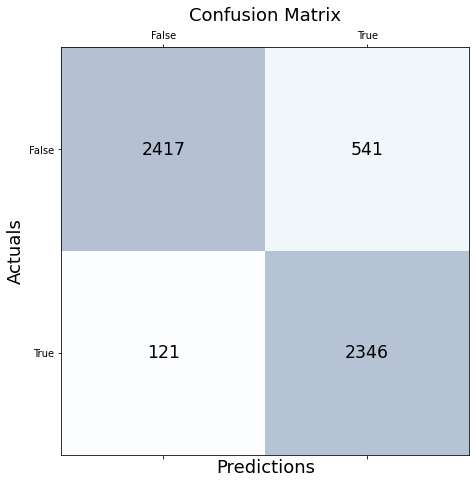

In [257]:
# Create a confusion matrix to visualise the performance 
from sklearn.metrics import confusion_matrix

predictions = np.argmax(model.predict(X_test_scaled), axis=-1)

conf_matrix = confusion_matrix(y_true=encoded_y_test, y_pred=predictions)

fig, ax = plt.subplots(figsize=(7.5, 7.5))

ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predictions', fontsize=18)
ax.set_xticks([0,1])
ax.set_xticklabels(target_names)
plt.ylabel('Actuals', fontsize=18)
ax.set_yticks([0,1])
ax.set_yticklabels(target_names)

plt.show()

In [152]:
# Use recursive feature elimination to identify the best performing features
from sklearn.feature_selection import RFECV
# from sklearn.linear_model import LinearRegression
from sklearn import tree


# Initiate RFE cross-validation and fit with a linear regression model
rfecv = RFECV(
    estimator=tree.DecisionTreeClassifier(),
    min_features_to_select=8,
    step=5,
    n_jobs=-1,
    scoring="r2",
    cv=5,
)

_ = rfecv.fit(X_train_scaled, encoded_y_train)

# Print the best columns
X_train.columns[rfecv.support_]



Index(['sex', 'calcage', 'citizen', 'msolo', 'new_route', 'mo2used',
       'mo2climb', 'mo2descent', 'mo2sleep', 'stdrte', 'new_status'],
      dtype='object')

In [154]:
### RFE Suggests keeping all features


# Hyperperameter tuning

#### Talos Custom Hyperparameter Optimiser for Keras, Tensorflow used 
Availble from: <a href="https://github.com/autonomio/talos/">https://github.com/autonomio/talos/</a>
<img src="https://raw.githubusercontent.com/autonomio/talos/master/logo.png">

In [155]:
import talos

# Function to run the model 
def everest(x_train, y_train, x_val, y_val, params):
    model = Sequential()
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1], 
              activation=params['activation']))
 
    model.add(Dropout(params['dropout']))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=params['optimizer'], metrics=['accuracy'])
    
    out = model.fit(x_train, 
                    y_train,
                    validation_data=(x_val, y_val),
                    epochs=params['epochs'],
                    batch_size=params['batch_size'],
                    verbose=0)
    
    return out, model

In [158]:
# Create a parameter dictionary
p = {'first_neuron':[30,60,120,240],
    'hidden_layers':[1, 2],
    'batch_size': [10,20, 30],
    'epochs': [100, 150, 200],
    'dropout': [0],
    'optimizer': ['Nadam', 'Adam'],
    'losses': ['binary_crossentropy'],
    'activation':['relu'],
    'last_activation': ['sigmoid']}

In [159]:
t = talos.Scan(x=X_train_scaled, y=encoded_y_train, params=p, model=everest, experiment_name='everest_tune', round_limit=30)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [29:15<00:00, 58.53s/it]


In [160]:
t.details

experiment_name            everest_tune
random_method          uniform_mersenne
reduction_method                   None
reduction_interval                   50
reduction_window                     20
reduction_threshold                 0.2
reduction_metric                val_acc
complete_time            08/21/21/16:45
x_shape                     (16273, 11)
y_shape                        (16273,)
dtype: object

### Best parameters:  
  
(as per table below)  
first layer: 30  
hidden layers: 1  
activation: relu  
batch_size: 10  
epochs: 100  
dropout: 0  
optimizer: Nadam  
  

In [161]:
# Display a dataframe comapring the results of the different combinations 
t.data

,start,end,duration,round_epochs,loss,accuracy,val_loss,val_accuracy,activation,batch_size,dropout,epochs,first_neuron,hidden_layers,last_activation,losses,optimizer
0,08/21/21-161627,08/21/21-161654,27.428869,100,0.314192,0.877008,0.313542,0.876485,relu,30,0,100,240,1,sigmoid,binary_crossentropy,Adam
1,08/21/21-161654,08/21/21-161847,112.313444,150,0.314628,0.877710,0.316710,0.875871,relu,10,0,150,60,1,sigmoid,binary_crossentropy,Nadam
2,08/21/21-161847,08/21/21-162001,73.792638,100,0.318849,0.876657,0.316764,0.875666,relu,10,0,100,30,2,sigmoid,binary_crossentropy,Adam
3,08/21/21-162001,08/21/21-162027,26.533146,100,0.319753,0.875252,0.314730,0.877100,relu,30,0,100,30,2,sigmoid,binary_crossentropy,Nadam
4,08/21/21-162027,08/21/21-162254,146.847889,200,0.312867,0.878588,0.320297,0.875256,relu,10,0,200,60,2,sigmoid,binary_crossentropy,Nadam
5,08/21/21-162254,08/21/21-162333,38.282059,100,0.316513,0.877008,0.317701,0.874027,relu,20,0,100,60,2,sigmoid,binary_crossentropy,Adam
6,08/21/21-162333,08/21/21-162447,74.685859,100,0.314151,0.876657,0.320401,0.874846,relu,10,0,100,240,2,sigmoid,binary_crossentropy,Adam
7,08/21/21-162448,08/21/21-162546,58.378733,150,0.310814,0.878325,0.319806,0.874846,relu,20,0,150,240,1,sigmoid,binary_crossentropy,Adam
8,08/21/21-162546,08/21/21-162625,38.974841,100,0.320476,0.875165,0.316014,0.877100,relu,20,0,100,30,1,sigmoid,binary_crossentropy,Adam
9,08/21/21-162625,08/21/21-162740,75.203448,200,0.311862,0.877623,0.319145,0.874027,relu,20,0,200,120,1,sigmoid,binary_crossentropy,Nadam


# Re-Training 

In [164]:
# Retrain the model with the optimised paramaters 

p_optimisied = {'first_neuron':30,
#                 'second_neuron':15,
                'hidden_layers':1,
                'batch_size': 10,
                'epochs': 100,
                'dropout': 0,
                'optimizer': 'Nadam',
                'activation':'relu',
               }

def everest_optimised(x_train, y_train, params):
    model = Sequential()
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1], 
              activation=params['activation']))
    
#     model.add(Dense(params['second_neuron'], activation=params['activation']))
 
    model.add(Dropout(params['dropout']))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=params['optimizer'], metrics=['accuracy'])
    
    out = model.fit(x_train, 
                    y_train,
                    epochs=params['epochs'],
                    batch_size=params['batch_size'],
                    verbose=0)

    return out, model


In [165]:
# Re-fit the training data to the model
out, model = everest_optimised(X_train_scaled, encoded_y_train, p_optimisied)

In [167]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, encoded_y_test, verbose=2)
print(f"Neural Network Performace - Loss: {model_loss}, Accuracy: {model_accuracy}")

170/170 - 0s - loss: 0.3124 - accuracy: 0.8796
Neural Network Performace - Loss: 0.31235188245773315, Accuracy: 0.8796313405036926


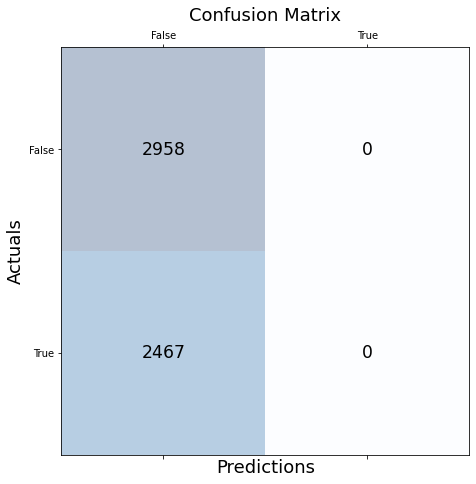

In [172]:
# Create a confusion matrix to visualise the performance of the adjusted model
predictions = np.argmax(model.predict(X_test_scaled), axis=-1)

conf_matrix = confusion_matrix(y_true=encoded_y_test, y_pred=predictions)

fig, ax = plt.subplots(figsize=(7.5, 7.5))

ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predictions', fontsize=18)
ax.set_xticks([0,1])
ax.set_xticklabels(target_names)
plt.ylabel('Actuals', fontsize=18)
ax.set_yticks([0,1])
ax.set_yticklabels(target_names)

plt.show()

# Save the Model

In [173]:
# Save the model
filename = 'success_model.h5'
model.save(filename)

# Load the Model

In [14]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("Model 2 - Deep_learning.h5")